__Analyzing the parametric sweeps over the climate feedback parameter and visualizing the results.__

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 25
import pandas as pd
import xarray as xr
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='once')

In [2]:
FIG_OUT_PATH = "figures/"
FIGURE_SIZE = (12, 8)

# Baseline [BL, BU]
BL = 1961
BU = 1990

SIMMOD_PATH = "../../SimMod/results/"

In [3]:
# Read observed temperature data
obs_temps_file = '../data/preprocessed/Observations_TAnom.csv'
observed_temperatures = pd.read_csv(obs_temps_file, skiprows=10)

# Read SimMod data and normalize to baseline
SINGLE_TAG_85 = "200828-112329-pulse_response-rcp85"
SINGLE_TAG_60 = "200828-112347-pulse_response-rcp60"
SINGLE_TAG_45 = "200828-112406-pulse_response-rcp45"
SINGLE_TAG_26 = "200828-112429-pulse_response-rcp26"
simmod85 = pd.read_csv(SIMMOD_PATH+SINGLE_TAG_85+"/results.csv")
simmod60 = pd.read_csv(SIMMOD_PATH+SINGLE_TAG_60+"/results.csv")
simmod45 = pd.read_csv(SIMMOD_PATH+SINGLE_TAG_45+"/results.csv")
simmod26 = pd.read_csv(SIMMOD_PATH+SINGLE_TAG_26+"/results.csv")
simmod85['t_s'] = simmod85['t_s']-simmod85[(simmod85['year']>=BL) & (simmod85['year']<=BU)]['t_s'].mean()
simmod60['t_s'] = simmod60['t_s']-simmod60[(simmod60['year']>=BL) & (simmod60['year']<=BU)]['t_s'].mean()
simmod45['t_s'] = simmod45['t_s']-simmod45[(simmod45['year']>=BL) & (simmod45['year']<=BU)]['t_s'].mean()
simmod26['t_s'] = simmod26['t_s']-simmod26[(simmod26['year']>=BL) & (simmod26['year']<=BU)]['t_s'].mean()

# Read SimMod ensemble data
TAG85 = "200921-195810-pulse_response-rcp85"
TAG60 = "200921-155342-pulse_response-rcp60"
TAG45 = "200921-114812-pulse_response-rcp45"
TAG26 = "200920-113832-pulse_response-rcp26"

with xr.open_dataset(SIMMOD_PATH+TAG26+"/results.nc") as dset:
    data = dset.copy()
    years = np.array(data.isel(c_sens=0)['year'])
    c_sens = np.array(data.coords['c_sens'].values)
    
    ensemble = []
    c_sens_coords = []
    for idx, c in enumerate(data.coords['c_sens'].values):
        if c<0.05:
            continue
        c_sens_coords.append(c)
        single_data = data.sel({'c_sens': c})['t_s']
        single_data -= single_data[(years>=BL) & (years<=BU)].mean()
        ensemble.append(single_data)
    ensemble = np.stack(ensemble, axis=1)
    
    ensemble26 = xr.DataArray(ensemble,
                              dims=['year', 'c_sens'],
                              coords={'year': years, 'c_sens': c_sens_coords})
    del data, years, c_sens, ensemble, single_data

with xr.open_dataset(SIMMOD_PATH+TAG45+"/results.nc") as dset:
    data = dset.copy()
    years = np.array(data.isel(c_sens=0)['year'])
    c_sens = np.array(data.coords['c_sens'].values)
    
    ensemble = []
    c_sens_coords = []
    for idx, c in enumerate(data.coords['c_sens'].values):
        if c<0.05:
            continue
        c_sens_coords.append(c)
        single_data = data.sel({'c_sens': c})['t_s']
        single_data -= single_data[(years>=BL) & (years<=BU)].mean()
        ensemble.append(single_data)
    ensemble = np.stack(ensemble, axis=1)
    
    ensemble45 = xr.DataArray(ensemble,
                              dims=['year', 'c_sens'],
                              coords={'year': years, 'c_sens': c_sens_coords})
    del data, years, c_sens, ensemble, single_data

with xr.open_dataset(SIMMOD_PATH+TAG60+"/results.nc") as dset:
    data = dset.copy()
    years = np.array(data.isel(c_sens=0)['year'])
    c_sens = np.array(data.coords['c_sens'].values)
    
    ensemble = []
    c_sens_coords = []
    for idx, c in enumerate(data.coords['c_sens'].values):
        if c<0.05:
            continue
        c_sens_coords.append(c)
        single_data = data.sel({'c_sens': c})['t_s']
        single_data -= single_data[(years>=BL) & (years<=BU)].mean()
        ensemble.append(single_data)
    ensemble = np.stack(ensemble, axis=1)
    
    ensemble60 = xr.DataArray(ensemble,
                              dims=['year', 'c_sens'],
                              coords={'year': years, 'c_sens': c_sens_coords})
    del data, years, c_sens, ensemble, single_data

with xr.open_dataset(SIMMOD_PATH+TAG85+"/results.nc") as dset:
    data = dset.copy()
    years = np.array(data.isel(c_sens=0)['year'])
    c_sens = np.array(data.coords['c_sens'].values)
    
    ensemble = []
    c_sens_coords = []
    for idx, c in enumerate(data.coords['c_sens'].values):
        if c<0.05:
            continue
        c_sens_coords.append(c)
        single_data = data.sel({'c_sens': c})['t_s']
        single_data -= single_data[(years>=BL) & (years<=BU)].mean()
        ensemble.append(single_data)
    ensemble = np.stack(ensemble, axis=1)
    
    ensemble85 = xr.DataArray(ensemble,
                              dims=['year', 'c_sens'],
                              coords={'year': years, 'c_sens': c_sens_coords})
    del data, years, c_sens, ensemble, single_data

In [4]:
years = np.array(ensemble26.coords['year'])

cmap = plt.get_cmap('turbo')

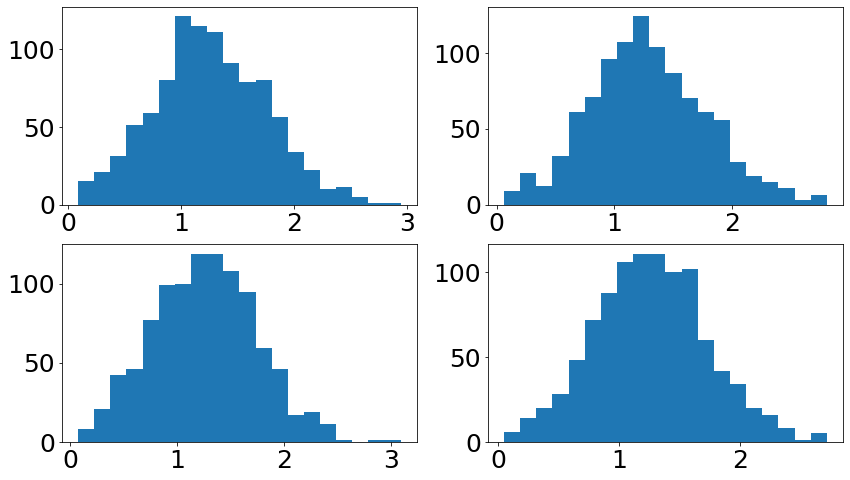

In [5]:
# Plot the sweep parameter distributions
fig, axes = plt.subplots(2,2, figsize=(14,8))
axes[0,0].hist(list(ensemble26.coords['c_sens'].values), bins=20)
axes[0,1].hist(list(ensemble45.coords['c_sens'].values), bins=20)
axes[1,0].hist(list(ensemble60.coords['c_sens'].values), bins=20)
axes[1,1].hist(list(ensemble85.coords['c_sens'].values), bins=20)
plt.show()

In [6]:
#################################
# Constraint analysis functions #
#################################
def coef_arma_cis(y_data, x_data):
    '''
    Calculate coefficients and CIs using OLS
    '''
    X = x_data
    X = sm.add_constant(X)
    smresults = sm.OLS(y_data, X).fit()
    ols_coef = smresults.params[1]
    ols_ci = ols_coef - smresults.conf_int(alpha=0.05, cols=None)[0][1]
    ci_lower = smresults.conf_int(alpha=0.05, cols=None)[0][1]
    ci_upper = smresults.conf_int(alpha=0.05, cols=None)[1][1]
    sd = (ci_upper - ols_coef) / 2.
    return {
            'coef' : ols_coef,
            'ci_lower' : ci_lower,
            'ci_upper' : ci_upper,
            'sd' : sd
    }

def obs_temp_time_trend(data, timeframe):
    coef, ci_lower, ci_upper = [], [], []
    temp_year_range = np.where((data['year'] >= timeframe[0]) & (data['year'] <= timeframe[1]))[0]

    for obs_temps in (['hadcrut4', 'gistemp', 'noaa', 'berkeley', 'cowtan_way']):
        years = data['year'][temp_year_range]
        temp_values = data[obs_temps][temp_year_range]
        results = coef_arma_cis(temp_values, years)
        coef.append(results['coef'])
        ci_lower.append(results['ci_lower'])
        ci_upper.append(results['ci_upper'])
    
    df = pd.DataFrame({'coef' : coef,
                       'ci_lower' : ci_lower,
                       'ci_upper' : ci_upper})
    df['ci_val'] = df['coef'] - df['ci_lower']
    
    coef_mean = df['coef'].mean()
    uncertainty = ((df['coef'].std()*2)**2 + df['ci_val'].mean()**2)**(0.5)
    return coef_mean, uncertainty

def model_temp_time_trend(temps, years, timeframe):
    year_range = (years >= timeframe[0]) & (years <= timeframe[1])
    year_values = years[year_range]
    temp_values = temps[year_range]
    year_values = pd.Series(year_values, name='year')
    temp_values = pd.Series(temp_values, name='temp')
    results = coef_arma_cis(temp_values, year_values)
    coef = results['coef']
    ci_lower = results['ci_lower']
    uncertainty = coef - ci_lower
    return coef, uncertainty

def temp_time_trend_constraint(ensemble, obs_temps, timeframe):
    print('Analyzing the period from ', timeframe[0], ' to ', timeframe[1])
    obs_trend, obs_err = obs_temp_time_trend(obs_temps, timeframe)
    ensemble_constr = ensemble.copy(deep=True)
    constr_frac = 0
    for c_sens in ensemble.coords['c_sens'].values:
        temp_values = np.array(ensemble.sel({'c_sens': c_sens}))
        year_values = np.array(ensemble.coords['year'].values)
        single_trend, single_err = model_temp_time_trend(temp_values, year_values, timeframe)
        if not abs(single_trend - obs_trend) < np.sqrt(single_err**2 + obs_err**2):
            ensemble_constr = ensemble_constr.drop_sel(c_sens=c_sens)
        else:
            constr_frac += 1
    
    constr_frac /= len(ensemble.coords['c_sens'])
    return ensemble_constr, constr_frac

# rcp 8.5
---

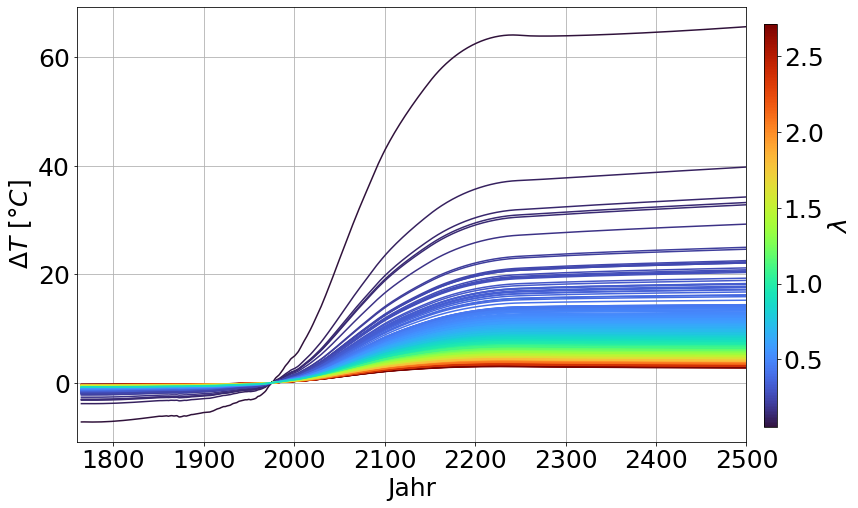

In [8]:
# Plot the full ensemble
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(ensemble85.coords['c_sens'].values),
                            vmax=max(ensemble85.coords['c_sens'].values))
for c_sens in ensemble85.coords['c_sens'].values:
    ax.plot(ensemble85.coords['year'], ensemble85.sel(c_sens=c_sens), c=cmap(norm(c_sens)))

ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.grid()
ax.set_xlim(1760, 2500)
#ax.set_title("Gesamtes Ensemble RCP8.5")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp85_ensemble_full.pdf", bbox_inches="tight")
plt.show()

In [9]:
ensemble85

<xarray.DataArray (year: 736, c_sens: 992)>
array([[-0.45820032, -0.37406128, -1.12401912, ..., -0.82821704,
        -0.75572887, -0.81498516],
       [-0.45729508, -0.37323443, -1.12264378, ..., -0.82704563,
        -0.75460658, -0.81382272],
       [-0.45655219, -0.37258174, -1.12140863, ..., -0.82601362,
        -0.75362542, -0.81279991],
       ...,
       [ 4.00045763,  3.13881224, 11.99503035, ...,  8.28162853,
         7.39531924,  8.11868067],
       [ 4.00000342,  3.13840887, 11.99548658, ...,  8.28135573,
         7.39494852,  8.11838754],
       [ 3.99955265,  3.13800843, 11.99594569, ...,  8.28108711,
         7.39458205,  8.11809861]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 1.836 2.358 0.5502 0.9016 ... 0.843 0.9554 0.8618

In [9]:
data_constr85, constr_frac85 = temp_time_trend_constraint(ensemble85, observed_temperatures, (1970, 2000))
print("Member fraction that passed the constraint: ", constr_frac85)
print("Total number that passed: ", constr_frac85 * len(ensemble85.coords['c_sens']))

Analyzing the period from  1970  to  2000


/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/jeremias/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


Member fraction that passed the constraint:  0.6360887096774194
Total number that passed:  631.0


In [15]:
data_constr85

<xarray.DataArray (year: 736, c_sens: 631)>
array([[-0.45820032, -0.55709899, -0.53329238, ..., -0.55295035,
        -0.46839806, -0.53638709],
       [-0.45729508, -0.55611584, -0.5323271 , ..., -0.55197028,
        -0.46748426, -0.53541946],
       [-0.45655219, -0.5552848 , -0.53151606, ..., -0.55114268,
        -0.46673156, -0.53460578],
       ...,
       [ 4.00045763,  5.07503066,  4.81072089, ...,  5.02872696,
         4.10830676,  4.84488584],
       [ 4.00000342,  5.07455301,  4.8102448 , ...,  5.02824939,
         4.10784816,  4.84440939],
       [ 3.99955265,  5.07407929,  4.80977253, ...,  5.02777572,
         4.10739307,  4.84393678]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 1.836 1.431 1.514 1.348 ... 1.445 1.786 1.503

In [16]:
# Calculate the confidence intervals
conf_int85 = np.zeros((len(years),2))
for idx, y in enumerate(years):
    time_slice = np.array(data_constr85.sel(year=y))
    mean = time_slice.mean()
    std = time_slice.std()
    conf_int85[idx, 0] = mean - 1.96*std
    conf_int85[idx, 1] = mean + 1.96*std

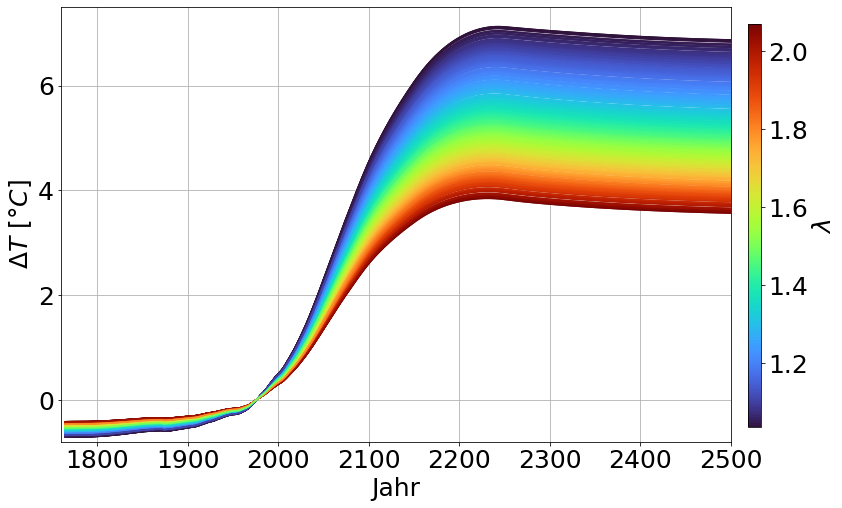

In [18]:
# Plot the ensemble with constraint
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(data_constr85.coords['c_sens'].values),
                            vmax=max(data_constr85.coords['c_sens'].values))

for c_sens in data_constr85.coords['c_sens'].values:
    ax.plot(data_constr85.coords['year'], data_constr85.sel(c_sens=c_sens), c=cmap(norm(c_sens)))
    
ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.set_ylim(-0.8, 7.5)
ax.grid()
#ax.set_title("Eingeschränktes Ensemble RCP8.5")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp85_ensemble_constr.pdf", bbox_inches="tight")
plt.show()

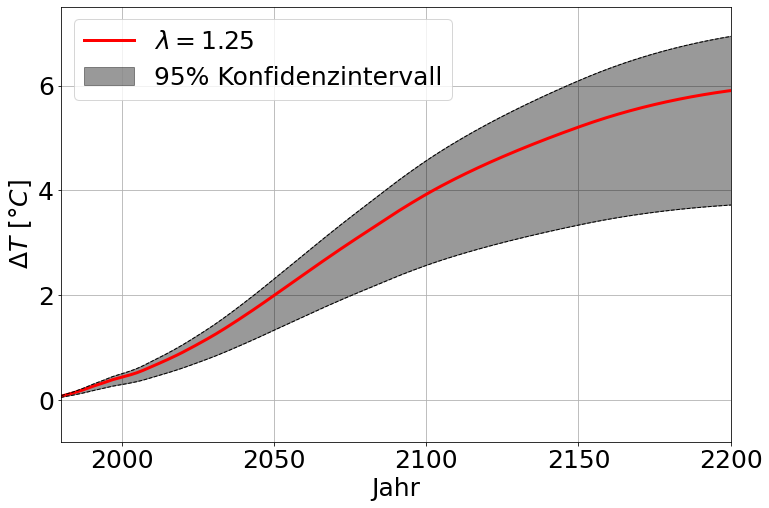

In [20]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.plot(simmod85['year'], simmod85['t_s'], c='r', lw=3, label=r"$\lambda=1.25$")
ax.plot(years, conf_int85[:,0], c='k', lw=1, ls='dashed')
ax.plot(years, conf_int85[:,1], c='k', lw=1, ls='dashed')
ax.fill_between(years, conf_int85[:,0], conf_int85[:,1], color='k', alpha=0.4,
                label='95% Konfidenzintervall')
ax.set_xlim(1980, 2200)
ax.set_ylim(-0.8, 7.5)
ax.grid()
ax.legend()
#ax.set_title("RCP8.5")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp85_CI.pdf", bbox_inches="tight")
plt.show()

# rcp 6.0
---

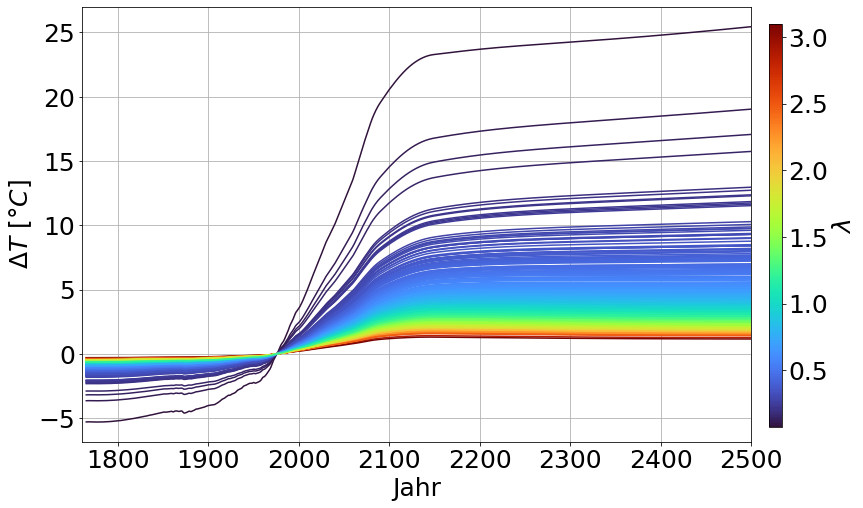

In [21]:
# Plot the full ensemble
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(ensemble60.coords['c_sens'].values),
                            vmax=max(ensemble60.coords['c_sens'].values))
for c_sens in ensemble60.coords['c_sens'].values:
    ax.plot(ensemble60.coords['year'], ensemble60.sel(c_sens=c_sens), c=cmap(norm(c_sens)))

ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.grid()
#ax.set_title("Gesamtes Ensemble RCP6.0")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp60_ensemble_full.pdf", bbox_inches="tight")
plt.show()

In [16]:
ensemble60

<xarray.DataArray (year: 736, c_sens: 989)>
array([[-1.22994934, -0.44273758, -0.56941341, ..., -0.90359721,
        -0.46605913, -0.64310127],
       [-1.2284983 , -0.44184564, -0.56842118, ..., -0.90237463,
        -0.46514728, -0.64205635],
       [-1.22718986, -0.44111801, -0.56758004, ..., -0.90129059,
        -0.46439682, -0.64115747],
       ...,
       [ 6.64829943,  1.86093497,  2.54453739, ...,  4.55998687,
         1.98243415,  2.96648253],
       [ 6.64899375,  1.86083153,  2.54445096, ...,  4.56014221,
         1.98233141,  2.96642279],
       [ 6.64969058,  1.86072997,  2.54436685, ...,  4.56030038,
         1.98223065,  2.96636556]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 0.4844 1.916 1.391 1.102 ... 0.7474 1.797 1.186

In [12]:
data_constr60, constr_frac60 = temp_time_trend_constraint(ensemble60, observed_temperatures, (1970, 2000))
print("Member fraction that passed the constraint: ", constr_frac60)
print("Total number that passed: ", constr_frac60 * len(ensemble60.coords['c_sens']))

Analyzing the period from  1970  to  2000
Member fraction that passed the constraint:  0.6258847320525783
Total number that passed:  619.0


In [22]:
data_constr60

<xarray.DataArray (year: 736, c_sens: 619)>
array([[-0.44273758, -0.56941341, -0.67952878, ..., -0.60939623,
        -0.46605913, -0.64310127],
       [-0.44184564, -0.56842118, -0.67845858, ..., -0.60837511,
        -0.46514728, -0.64205635],
       [-0.44111801, -0.56758004, -0.67753248, ..., -0.60750212,
        -0.46439682, -0.64115747],
       ...,
       [ 1.86093497,  2.54453739,  3.18073521, ...,  2.77148275,
         1.98243415,  2.96648253],
       [ 1.86083153,  2.54445096,  3.18069386, ...,  2.77140911,
         1.98233141,  2.96642279],
       [ 1.86072997,  2.54436685,  3.1806551 , ...,  2.7713379 ,
         1.98223065,  2.96636556]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 1.916 1.391 1.102 1.157 ... 1.274 1.797 1.186

In [23]:
# Calculate the confidence intervals
conf_int60 = np.zeros((len(years),2))
for idx, y in enumerate(years):
    time_slice = np.array(data_constr60.sel(year=y))
    mean = time_slice.mean()
    std = time_slice.std()
    conf_int60[idx, 0] = mean - 1.96*std
    conf_int60[idx, 1] = mean + 1.96*std

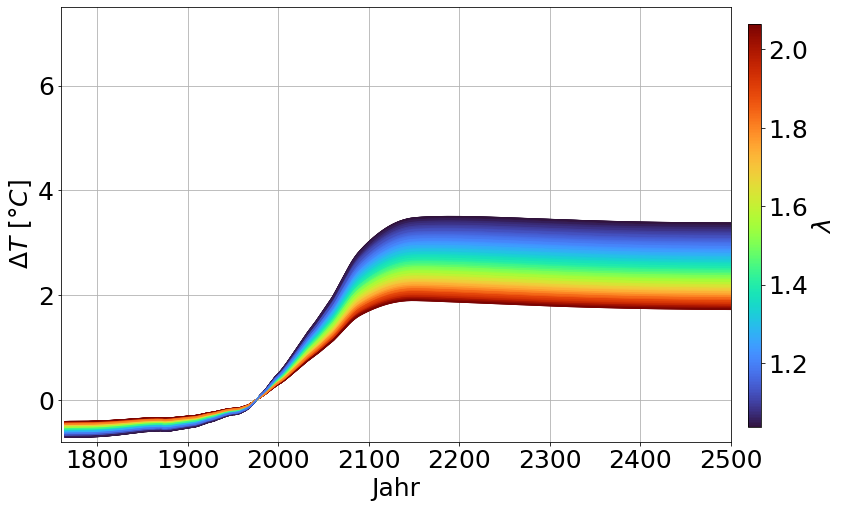

In [24]:
# Plot the ensemble with constraint
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(data_constr60.coords['c_sens'].values),
                            vmax=max(data_constr60.coords['c_sens'].values))

for c_sens in data_constr60.coords['c_sens'].values:
    ax.plot(data_constr60.coords['year'], data_constr60.sel(c_sens=c_sens), c=cmap(norm(c_sens)))
    
ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.set_ylim(-0.8, 7.5)
ax.grid()
#ax.set_title("Eingeschränktes Ensemble RCP6.0")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp60_ensemble_constr.pdf", bbox_inches="tight")
plt.show()

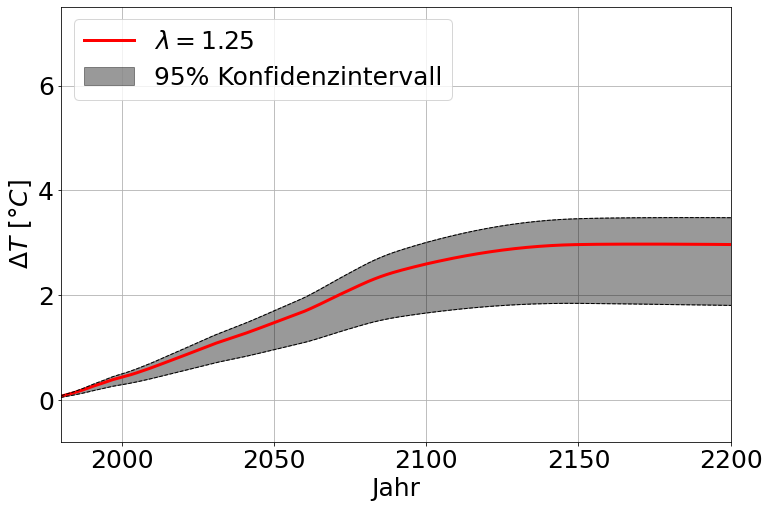

In [25]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.plot(simmod60['year'], simmod60['t_s'], c='r', lw=3, label=r"$\lambda=1.25$")
ax.plot(years, conf_int60[:,0], c='k', lw=1, ls='dashed')
ax.plot(years, conf_int60[:,1], c='k', lw=1, ls='dashed')
ax.fill_between(years, conf_int60[:,0], conf_int60[:,1], color='k', alpha=0.4,
                label='95% Konfidenzintervall')
ax.set_xlim(1980, 2200)
ax.set_ylim(-0.8, 7.5)
ax.grid()
ax.legend(loc="upper left")
#ax.set_title("RCP6.0")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp60_CI.pdf", bbox_inches="tight")
plt.show()

# rcp 4.5
---

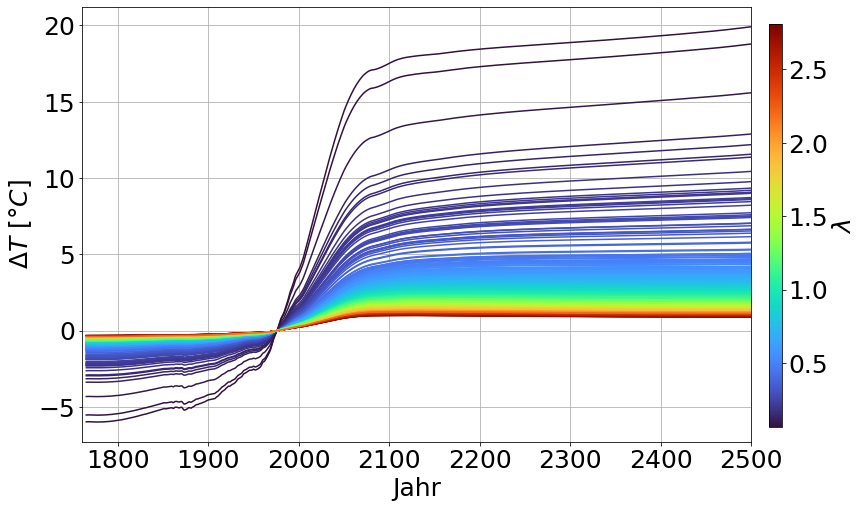

In [26]:
# Plot the full ensemble
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(ensemble45.coords['c_sens'].values),
                            vmax=max(ensemble45.coords['c_sens'].values))
for c_sens in ensemble45.coords['c_sens'].values:
    ax.plot(ensemble45.coords['year'], ensemble45.sel(c_sens=c_sens), c=cmap(norm(c_sens)))

ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.grid()
#ax.set_title("Gesamtes Ensemble RCP4.5")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp45_ensemble_full.pdf", bbox_inches="tight")
plt.show()

In [23]:
ensemble45

<xarray.DataArray (year: 736, c_sens: 993)>
array([[-5.53134749, -0.35482072, -0.49654384, ..., -0.61429023,
        -0.45845622, -0.39549748],
       [-5.52627512, -0.35401448, -0.49560713, ..., -0.61326562,
        -0.45755076, -0.39464906],
       [-5.52161048, -0.35338544, -0.49482835, ..., -0.61238883,
        -0.45680762, -0.39397154],
       ...,
       [18.77330057,  0.99461445,  1.50925548, ...,  1.9792873 ,
         1.36508058,  1.1360726 ],
       [18.78076969,  0.99468642,  1.50938096, ...,  1.97947799,
         1.36518935,  1.13615765],
       [18.7882789 ,  0.99476179,  1.50951124, ...,  1.97967458,
         1.36530256,  1.13624652]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 0.06803 2.513 1.659 0.6427 ... 1.26 1.835 2.203

In [13]:
data_constr45, constr_frac45 = temp_time_trend_constraint(ensemble45, observed_temperatures, (1970, 2000))
print("Member fraction that passed the constraint: ", constr_frac45)
print("Total number that passed: ", constr_frac45 * len(ensemble45.coords['c_sens']))

Analyzing the period from  1970  to  2000
Member fraction that passed the constraint:  0.6283987915407855
Total number that passed:  624.0


In [27]:
data_constr45

<xarray.DataArray (year: 736, c_sens: 624)>
array([[-0.49654384, -0.49702819, -0.67448281, ..., -0.47484945,
        -0.61429023, -0.45845622],
       [-0.49560713, -0.49609109, -0.67341608, ..., -0.47393031,
        -0.61326562, -0.45755076],
       [-0.49482835, -0.49531187, -0.67249371, ..., -0.47317151,
        -0.61238883, -0.45680762],
       ...,
       [ 1.50925548,  1.51111513,  2.23211923, ...,  1.42663071,
         1.9792873 ,  1.36508058],
       [ 1.50938096,  1.51124083,  2.23235238, ...,  1.42674643,
         1.97947799,  1.36518935],
       [ 1.50951124,  1.51137135,  2.23259195, ...,  1.42686676,
         1.97967458,  1.36530256]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 1.659 1.657 1.113 1.534 ... 1.176 1.755 1.26 1.835

In [28]:
# Calculate the confidence intervals
conf_int45 = np.zeros((len(years),2))
for idx, y in enumerate(years):
    time_slice = np.array(data_constr45.sel(year=y))
    mean = time_slice.mean()
    std = time_slice.std()
    conf_int45[idx, 0] = mean - 1.96*std
    conf_int45[idx, 1] = mean + 1.96*std

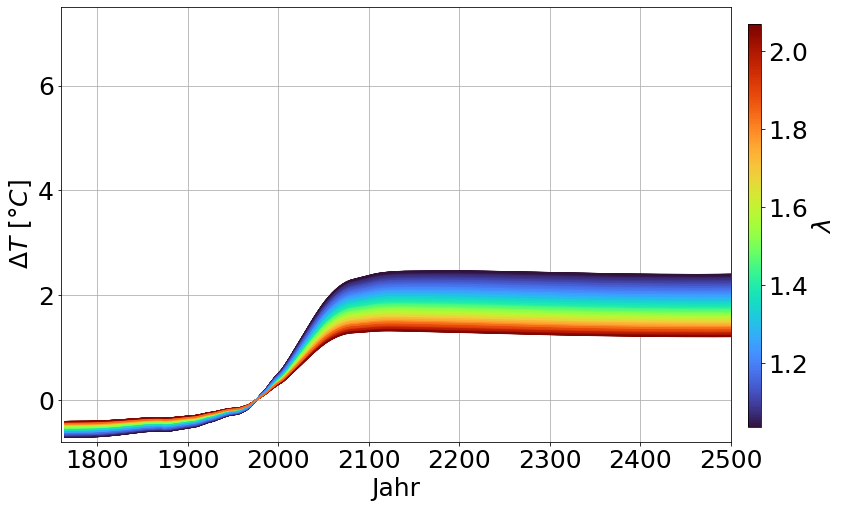

In [29]:
# Plot the ensemble with constraint
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(data_constr45.coords['c_sens'].values),
                            vmax=max(data_constr45.coords['c_sens'].values))

for c_sens in data_constr45.coords['c_sens'].values:
    ax.plot(data_constr45.coords['year'], data_constr45.sel(c_sens=c_sens), c=cmap(norm(c_sens)))
    
ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.set_ylim(-0.8, 7.5)
ax.grid()
#ax.set_title("Eingeschränktes Ensemble RCP4.5")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp45_ensemble_constr.pdf", bbox_inches="tight")
plt.show()

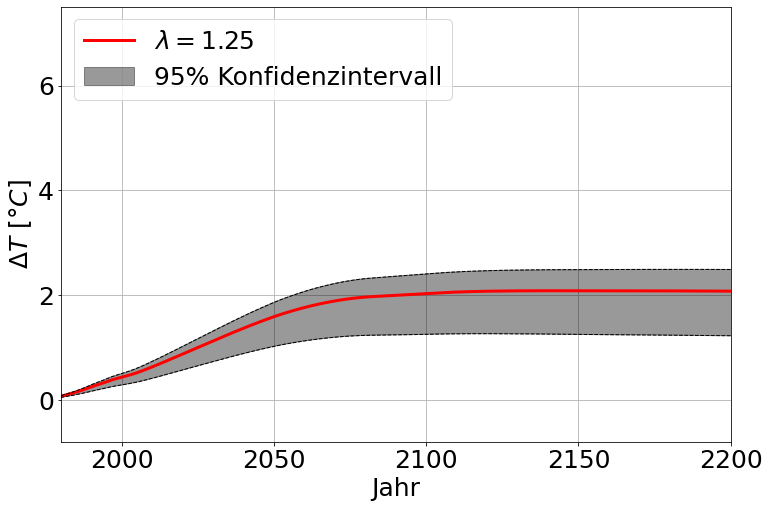

In [30]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.plot(simmod45['year'], simmod45['t_s'], c='r', lw=3, label=r"$\lambda=1.25$")
ax.plot(years, conf_int45[:,0], c='k', lw=1, ls='dashed')
ax.plot(years, conf_int45[:,1], c='k', lw=1, ls='dashed')
ax.fill_between(years, conf_int45[:,0], conf_int45[:,1], color='k', alpha=0.4,
                label='95% Konfidenzintervall')
ax.set_xlim(1980, 2200)
ax.set_ylim(-0.8, 7.5)
ax.grid()
ax.legend(loc='upper left')
#ax.set_title("RCP4.5")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp45_CI.pdf", bbox_inches="tight")
plt.show()

# rcp 2.6
---

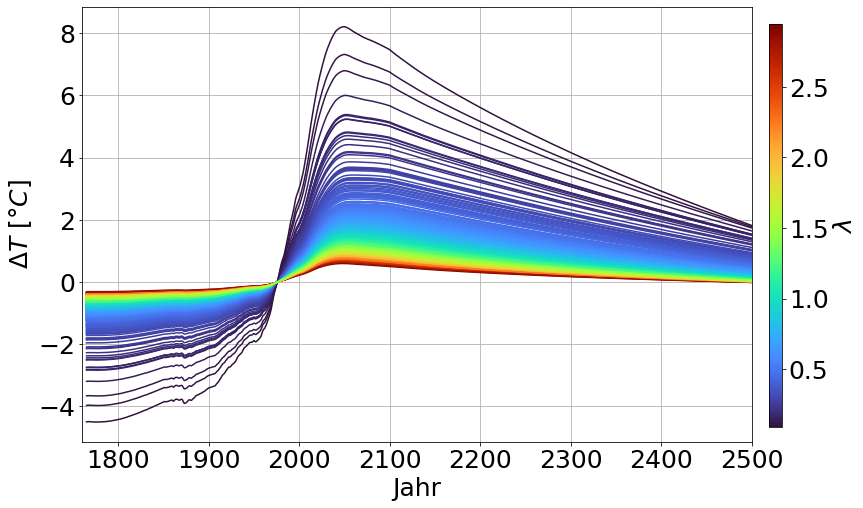

In [31]:
# Plot the full ensemble
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(ensemble26.coords['c_sens'].values),
                            vmax=max(ensemble26.coords['c_sens'].values))
for c_sens in ensemble26.coords['c_sens'].values:
    ax.plot(ensemble26.coords['year'], ensemble26.sel(c_sens=c_sens), c=cmap(norm(c_sens)))

ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.grid()
#ax.set_title("Gesamtes Ensemble RCP2.6")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp26_ensemble_full.pdf", bbox_inches="tight")
plt.show()

In [30]:
ensemble26

<xarray.DataArray (year: 736, c_sens: 994)>
array([[-1.26507807, -0.97579716, -0.52883689, ..., -0.50452424,
        -0.62667449, -0.53355183],
       [-1.26360157, -0.97452516, -0.527875  , ..., -0.50358121,
        -0.62564111, -0.53258635],
       [-1.26226864, -0.97339165, -0.52706778, ..., -0.50279526,
        -0.62475476, -0.53177509],
       ...,
       [ 0.58857377,  0.34455707,  0.05471295, ...,  0.04452136,
         0.10255927,  0.05676992],
       [ 0.58480552,  0.34168063,  0.05329247, ...,  0.04317717,
         0.10082554,  0.05533457],
       [ 0.58104209,  0.3388083 ,  0.05187446, ...,  0.04183535,
         0.09909467,  0.0539017 ]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 0.4654 0.6714 1.531 1.424 ... 1.626 1.228 1.513

In [14]:
data_constr26, constr_frac26 = temp_time_trend_constraint(ensemble26, observed_temperatures, (1970, 2000))
print("Member fraction that passed the constraint: ", constr_frac26)
print("Total number that passed: ", constr_frac26 * len(ensemble26.coords['c_sens']))

Analyzing the period from  1970  to  2000
Member fraction that passed the constraint:  0.6086519114688129
Total number that passed:  605.0


In [32]:
data_constr26

<xarray.DataArray (year: 736, c_sens: 605)>
array([[-0.52883689, -0.55926423, -0.69144607, ..., -0.50452424,
        -0.62667449, -0.53355183],
       [-0.527875  , -0.55827947, -0.69036766, ..., -0.50358121,
        -0.62564111, -0.53258635],
       [-0.52706778, -0.55744665, -0.6894328 , ..., -0.50279526,
        -0.62475476, -0.53177509],
       ...,
       [ 0.05471295,  0.06844063,  0.13985422, ...,  0.04452136,
         0.10255927,  0.05676992],
       [ 0.05329247,  0.06692372,  0.13790913, ...,  0.04317717,
         0.10082554,  0.05533457],
       [ 0.05187446,  0.0654094 ,  0.13596715, ...,  0.04183535,
         0.09909467,  0.0539017 ]])
Coordinates:
  * year     (year) float64 1.765e+03 1.766e+03 1.767e+03 ... 2.499e+03 2.5e+03
  * c_sens   (c_sens) float64 1.531 1.424 1.077 1.82 ... 1.415 1.626 1.228 1.513

In [33]:
# Calculate the confidence intervals
conf_int26 = np.zeros((len(years),2))
for idx, y in enumerate(years):
    time_slice = np.array(data_constr26.sel(year=y))
    mean = time_slice.mean()
    std = time_slice.std()
    conf_int26[idx, 0] = mean - 1.96*std
    conf_int26[idx, 1] = mean + 1.96*std

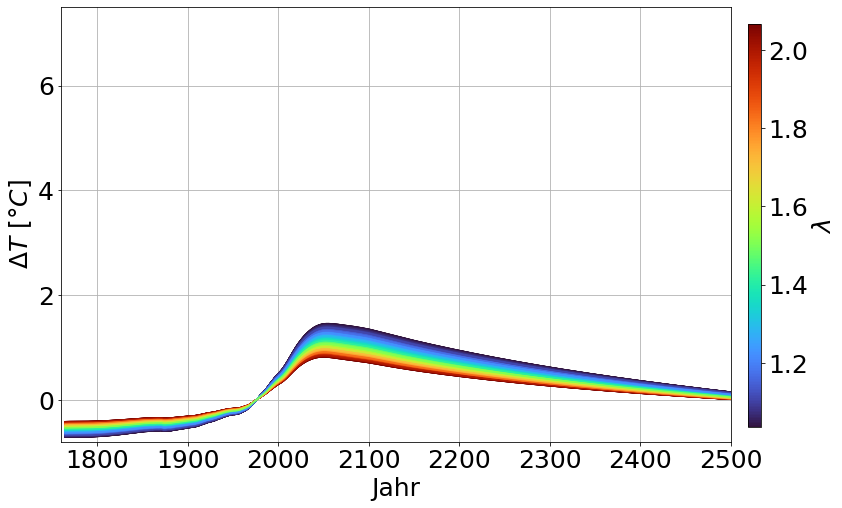

In [34]:
# Plot the ensemble with constraint
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
norm = mpl.colors.Normalize(vmin=min(data_constr26.coords['c_sens'].values),
                            vmax=max(data_constr26.coords['c_sens'].values))

for c_sens in data_constr26.coords['c_sens'].values:
    ax.plot(data_constr26.coords['year'], data_constr26.sel(c_sens=c_sens), c=cmap(norm(c_sens)))
    
ax1 = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
cb1.set_label(r"$\lambda$")

ax.set_xlim(1760, 2500)
ax.set_ylim(-0.8, 7.5)
ax.grid()
#ax.set_title("Eingeschränktes Ensemble RCP2.6")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp26_ensemble_constr.pdf", bbox_inches="tight")
plt.show()

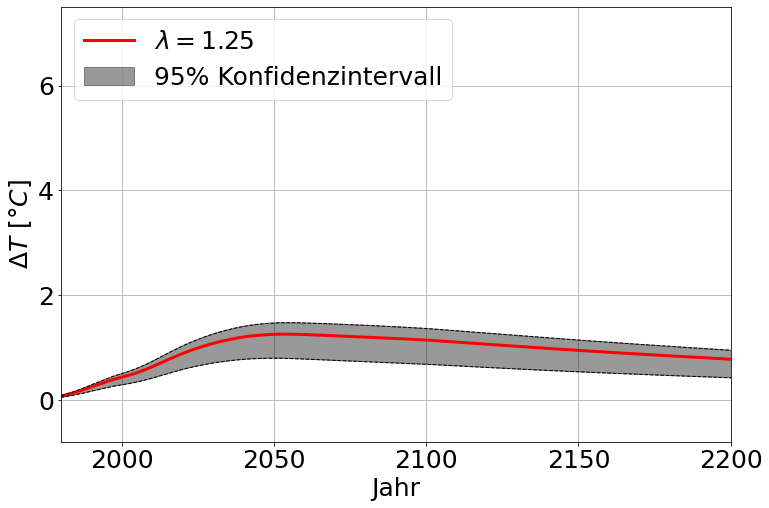

In [35]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.plot(simmod26['year'], simmod26['t_s'], c='r', lw=3, label=r"$\lambda=1.25$")
ax.plot(years, conf_int26[:,0], c='k', lw=1, ls='dashed')
ax.plot(years, conf_int26[:,1], c='k', lw=1, ls='dashed')
ax.fill_between(years, conf_int26[:,0], conf_int26[:,1], color='k', alpha=0.4,
                label='95% Konfidenzintervall')
ax.set_xlim(1980, 2200)
ax.set_ylim(-0.8, 7.5)
ax.grid()
ax.legend(loc="upper left")
#ax.set_title("RCP2.6")
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig(FIG_OUT_PATH+"rcp26_CI.pdf", bbox_inches="tight")
plt.show()